# Correlation Analysis


## Overview

Conduct a correlation analysis for the following metrics: 

- **Productivity** - Cases per man hour (CPMH)
- **Average Selector days**
- **Employees with USF over 365 days**:


## Problem Statement 
Is there a relationship between **Productivity**, **Average Selector Days** & **Selector with USF over 365 days**. 

## Contributors

Richard Avila  
Perman Rejepov  
LeeRyan Solomon.  


## Dataset
- Data comes driectly from a Table in Snowflake Datawarehouse `SUPPLY_CHAIN.SUPPLY_CHAIN.SC_SELECTOR_PRODUCTIVITY_P2YRS` and SQL is in `queries.py` file as a parameter call `tenure_cohort`. 
- Each combination of market and fiscal month is a data point, in other words the analysis was done on all USF markets.
- Time period for this analysis are between April and December.
- The YoY change is for **2019** & **2020**.

## Final Thoughts TL:DR

- **Correlation coefficient** for CPMH vs average selector days is **0.24**
- **Correlation coefficient** for CPMH vs employees at USF over 365 days hours is **0.43**

After switching data (i.e. coming from the Snowflake tables) the relationship  between CPMH and average selector days has decreased compared to the previous analysis. But the relationship between CPMH and Employees over 365 day increased. 

**Currently the data is looking at a period level and looking at relationship for all markets. Each markets behave differently. What if we break out each market and look at the relationship for CPMH and Avgerage Selector, Employees over 365 days at a weekly level. There will be around 40 data points for each market.**  

**Another thing to look into is Weighted CPMH based on Number of Employees within a Cohort. Can be discussed and more to come on this one.**




### Importing all dependencies

In [1]:
import os
os.chdir('/workspace')
from src.utils import correlation_result, plot_correlation, create_snowflake_engine
from src.queries import tenure_cohort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.core.pylabtools import figsize

### Importing Dataset 
- Data is being imported via a `sql` and being put into a `dataframe`
- Checking all the columns since it's needed to ingest when running the correlation using the functions `correlation_results` and `plot_correlation`

#### Fields in the file
- **uid**: Market_Name - Market_Number - Branch_Cd - Fiscal_month. 
- **prcnt_chng_avg_selector_days**: YoY percent change in of Average Selectors in Days.
- **prcnt_chng_over_365_days**: YoY percent change in Employees over 365 days hours. 
- **prcnt_chng_cpmh**: YoY percent change in Cases per Man Hours.

In [2]:
all_mkts_df = pd.read_sql(tenure_cohort, create_snowflake_engine())

In [5]:
all_mkts_df.columns

Index(['uid', 'wh_id', 'div_nbr', 'div_nm', 'fisc_mth_of_yr',
       'prcnt_chng_avg_selector_days', 'prcnt_chng_cpmh',
       'prcnt_chng_over_365_days'],
      dtype='object')

## Correlation coefficients

In [3]:
correlation_result(all_mkts_df,'prcnt_chng_cpmh', 'prcnt_chng_avg_selector_days')
correlation_result(all_mkts_df,'prcnt_chng_cpmh', 'prcnt_chng_over_365_days')

Correlation prcnt_chng_cpmh and prcnt_chng_avg_selector_days is 0.24
Correlation prcnt_chng_cpmh and prcnt_chng_over_365_days is 0.43


## Scatter plots

Below using the function `plot_correlation` to create scatter plots for the following:  

- CPMH change YOY vs Average Selector day change YoY
- CPMH change YOY vs Employees over 365 days percent change YoY

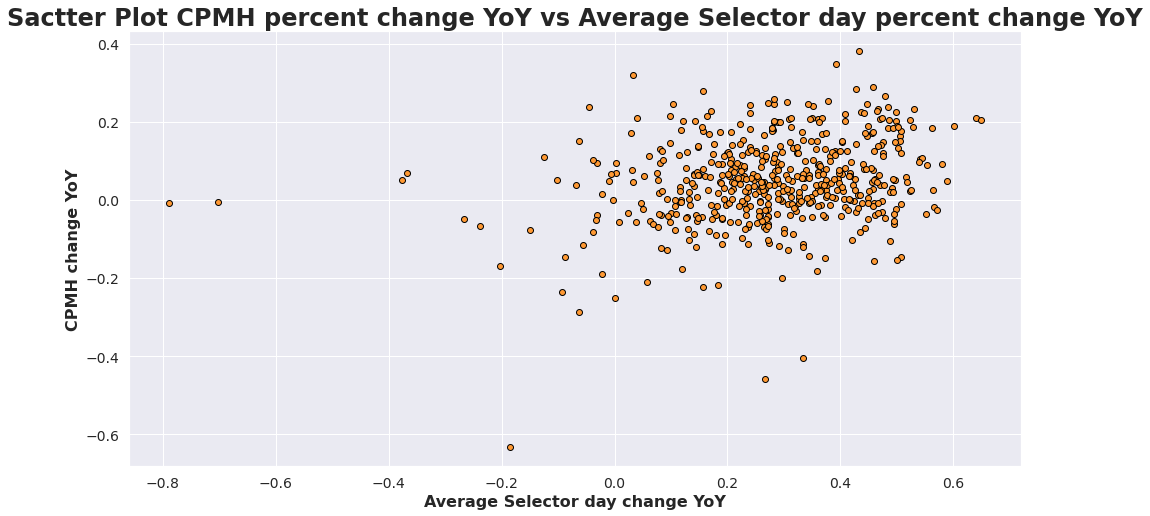

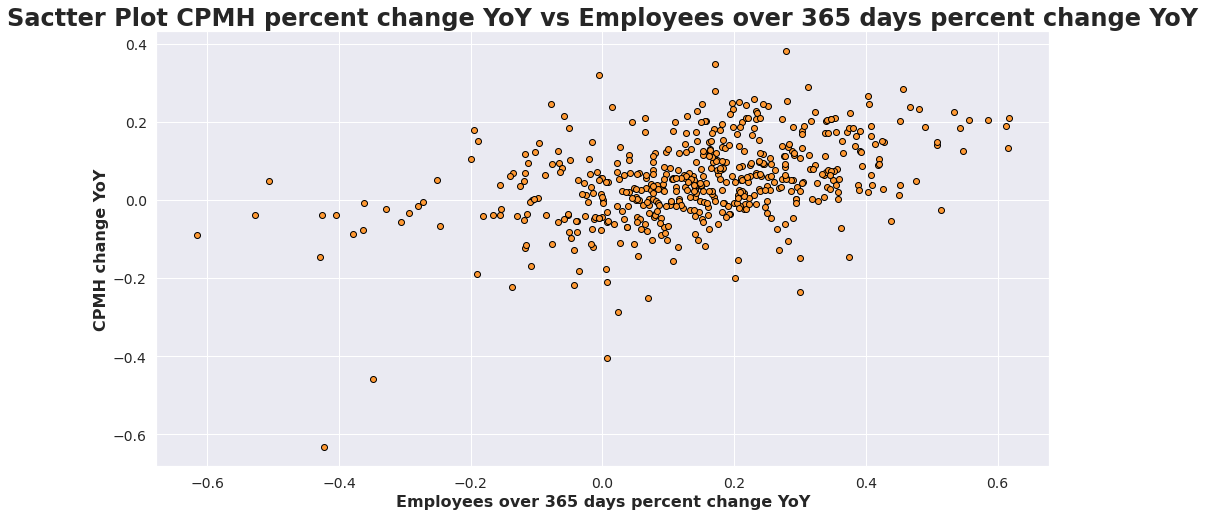

In [4]:
plot_correlation(df=all_mkts_df,
                 y_column='prcnt_chng_cpmh',
                 x_column='prcnt_chng_avg_selector_days',
                 title='Sactter Plot CPMH percent change YoY vs Average Selector day percent change YoY',
                 x_label='Average Selector day change YoY',
                 figure='data/imgs/CPMH_vs_Avg_Selector_Days.png')

plot_correlation(df=all_mkts_df,
                 y_column='prcnt_chng_cpmh',
                 x_column='prcnt_chng_over_365_days',
                 title='Sactter Plot CPMH percent change YoY vs Employees over 365 days percent change YoY',
                 x_label='Employees over 365 days percent change YoY',
                 figure='data/imgs/CPMH_vs_Employees_over_365_days.png')